# 1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Text Mining/Final/2014_kindle.csv",index_col=0)
df=df.dropna(subset=["overall","reviewText"]).reset_index(drop=True)
df.head()

In [ ]:
df.asin.value_counts()

B00JDYC5OI    502
B00H0V069M    481
B00HYQJPC2    364
B00KF0URBM    354
B00J1SP9FI    324
             ... 
B009NMC3FQ      1
B00CNX3V0S      1
B00BEJ16GI      1
B009NNL1UI      1
B00EJWZPWS      1
Name: asin, Length: 47037, dtype: int64

Select only books with more than 100 reviews

In [ ]:
review_100_book_lst = list(df["asin"].value_counts()[df["asin"].value_counts()>100].index)
df['review_wc_is_100more'] = df['asin'].apply(lambda x: 1 if x in review_100_book_lst else 0)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,0
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,0
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,0
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,0


In [ ]:
df = df.reset_index()

In [ ]:
import numpy as np
df['sample'] = np.zeros(len(df)).astype(int)

Only randomly select 10000 rows

In [ ]:
lst = list(df[df.review_wc_is_100more == 1].sample(n=10000, replace=False, random_state=1).index)
lst

[269824,
 269689,
 245427,
 322279,
 150972,
 136682,
 110700,
 296391,
 162804,
 311673,
 226805,
 224806,
 363694,
 137701,
 178169,
 35979,
 197792,
 236759,
 226941,
 254715,
 400580,
 287976,
 205283,
 214171,
 146415,
 214091,
 179432,
 354903,
 272629,
 89562,
 242957,
 246819,
 137733,
 400725,
 226812,
 178420,
 315228,
 313967,
 178047,
 204197,
 296399,
 163022,
 198230,
 265095,
 7376,
 194700,
 390789,
 104166,
 119596,
 224772,
 384712,
 363847,
 400571,
 299719,
 220863,
 355530,
 195685,
 201669,
 298686,
 333642,
 97062,
 89628,
 359738,
 375978,
 318432,
 406482,
 381816,
 296896,
 318182,
 358276,
 369856,
 96221,
 311603,
 293018,
 117103,
 299683,
 308244,
 274291,
 243191,
 407123,
 369966,
 354982,
 194723,
 381805,
 194738,
 226831,
 208538,
 246066,
 118986,
 367283,
 311314,
 325970,
 217087,
 146279,
 297060,
 150090,
 315220,
 32246,
 196651,
 259881,
 121216,
 224711,
 127539,
 89533,
 226691,
 246090,
 55870,
 375844,
 10900,
 243136,
 247380,
 113158,
 35

In [ ]:
sample = [1 if (df.loc[i,'index'] in lst) else 0 for i in range(len(df))]

In [ ]:
df['sample'] = sample

In [ ]:
#test
df.iloc[7445,:]

index                                                                7445
asin                                                           B004OA5ZTS
helpful                                                            [1, 2]
overall                                                                 5
reviewText              Truly enjoyed this book, was a great distracti...
reviewTime                                                    05 21, 2014
reviewerID                                                 A1I9S19N0T2U29
reviewerName                                                       tashun
summary                                                         nice read
unixReviewTime                                                 1400630400
review_wc_is_100more                                                    1
sample                                                                  1
Name: 7445, dtype: object

In [ ]:
df['sample'].sum()

10000

10000 random samples selected.

# 2. Topic Modeling

In [ ]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [ ]:
df_10k = df[df['sample'] == 1]
len(df_10k)

10000

In [ ]:
sentence= list(df_10k["reviewText"])

normalized_corpus_news = normalize_corpus(sentence) #normalization

bow_vectorizer_news = CountVectorizer(max_features=1000) #first 1000 words

bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_corpus_news)

In [ ]:
lda_news = LatentDirichletAllocation(n_components=5, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)

In [ ]:
no_top_words_news = 35
display_topics(lda_news, bow_vectorizer_news.get_feature_names(), no_top_words_news)

Topic 0:
book story read character like really good enjoy well author love great romance write much think little lot time could plot end bit star fun series first scene felt sex look novel way main line
Topic 1:
love book story read heart series character want take know much way time amazing every laugh cry could feel life end write emotion give beautiful even family favorite everything never wait logan perfect sawyer word
Topic 2:
love book hot read sexy story alpha want series sex brother mc woman great first male boy strong know meet steamy sweet man night wait bad shane girl like good well relationship nico ethan dex
Topic 3:
book read love series wait story next great end good could author really want put first keep character well start look write like enjoy happen recommend buy know part forward another finish time hope definitely
Topic 4:
know life want thing like time take think love friend way year give really even girl never need past relationship work help feel leave woman m

In [ ]:
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  32.861580
0       51.163364 -159.968018       2        1  22.008076
3      -73.144554   21.523815       3        1  17.109467
1      -66.410133 -110.606438       4        1  15.232357
2       54.417324   12.443444       5        1  12.788520, topic_info=     Term          Freq         Total Category  logprob  loglift
101  book  17098.000000  17098.000000  Default  30.0000  30.0000
542  love  11279.000000  11279.000000  Default  29.0000  29.0000
723  read   9556.000000   9556.000000  Default  28.0000  28.0000
432   hot   2189.000000   2189.000000  Default  27.0000  27.0000
953  wait   2828.000000   2828.000000  Default  26.0000  26.0000
..    ...           ...           ...      ...      ...      ...
498  know    345.773654   3590.596665   Topic5  -5.0140  -0.2837
367  girl    275.021176   1153.785960   Topic5  -5.2429   0.6227
953  wait    290.026373   2828.723455   Topic5  -5.1898  -0.2210
525  like    273.902535   5067.931801   Topic5  -5.2470  -0.8613
374  good    262.491181   3470.633754   Topic5  -5.2895  -0.5253

[355 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         3  0.988462   abbi
17        1  0.995384  aerie
23        2  0.987609  aidan
24        2  0.990502  alien
30        5  0.998263  alpha
...     ...       ...    ...
990       5  0.065859  write
995       1  0.953093   year
995       4  0.045886   year
998       1  0.998550  young
999       4  0.998292   zeth

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [ ]:
lda_news_topic_weights = lda_news.transform(bow_news_corpus) #5 topic weights for each topic

#array of document "names" and topic "names" ("names" are just indecies)
doc_names = [i for i in range(len(normalized_corpus_news))] #each document. Same order as they are in the original dataset.
topic_names = ["Topic_" + str(i) for i in range(5)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_news_topic_weights,4), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,0.5856,0.0206,0.0193,0.3549,0.0195
1,0.8511,0.0384,0.0388,0.0358,0.0359
2,0.9376,0.0166,0.0155,0.0152,0.0151
3,0.8085,0.0192,0.0195,0.0196,0.1332
4,0.9131,0.0216,0.0211,0.0223,0.0219


In [ ]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic


df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic
0,0.5856,0.0206,0.0193,0.3549,0.0195,0
1,0.8511,0.0384,0.0388,0.0358,0.0359,0
2,0.9376,0.0166,0.0155,0.0152,0.0151,0
3,0.8085,0.0192,0.0195,0.0196,0.1332,0
4,0.9131,0.0216,0.0211,0.0223,0.0219,0


In [ ]:
#save
df_10k_review_topic = pd.DataFrame({'review':normalized_corpus_news, 'label': dominant_topic}, columns=['review', 'label'])
df_10k_review_topic.head()

,review,label
0,pleasantly surprise book laugh alternately exa...,0
1,exciting page turner easy catch action bubba p...,0
2,entertain although quite serious look murder m...,0
3,interesting mystery finger point bubba althoug...,0
4,great story figure entirely end look clue alon...,0


In [ ]:
##save
df_10k_review_topic.to_csv("/content/drive/MyDrive/Text Mining/Final/df_10k_review_topic.csv")

In [ ]:
df_document_topic['dominant_topic'].value_counts()

3    2910
0    2805
4    2010
1    1263
2    1012
Name: dominant_topic, dtype: int64

# 3. Making topic label as a new feature of the original dataset.

In [ ]:
df['topic'] = np.ones(len(df)).astype(int)*10

Test how to label the records in the original dataset.

In [ ]:
df[df['sample']==1].index

Int64Index([  5367,   5369,   5371,   5373,   5374,   5378,   5380,   5383,
              5386,   5389,
            ...
            407126, 407128, 407129, 407132, 407134, 407135, 407138, 407141,
            407143, 407145],
           dtype='int64', length=10000)

In [ ]:
df[df['sample']==1].index[3]

5373

In [ ]:
#test
for i in range(5):
  print(i)
  print(df.loc[df[df['sample']==1].index[i],'topic'])
  print(df_document_topic.loc[i,'dominant_topic'])
  print('-------------------------------------')
 

0
10
0
-------------------------------------
1
10
0
-------------------------------------
2
10
0
-------------------------------------
3
10
0
-------------------------------------
4
10
0
-------------------------------------


In [ ]:
for i in range(len(df_10k)):
  topic_label = df_document_topic.loc[i,'dominant_topic']
  df.loc[df[df['sample']==1].index[i],'topic'] = topic_label

In [ ]:
df.topic.value_counts() #10 represents we didn't use such records to do the topic modeling.

10    400693
3       2910
0       2805
4       2010
1       1263
2       1012
Name: topic, dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/Text Mining/Final/topic_modeling_result_10k_labeled.csv')  

# 4. SVM training

In [ ]:
import pandas as pd
df_10k_review_topic=pd.read_csv("/content/drive/MyDrive/Text Mining/Final/topic_modeling_result_10k_labeled.csv",index_col=0)
df_10k_review_topic.head()

,review,label
0,pleasantly surprise book laugh alternately exa...,0
1,exciting page turner easy catch action bubba p...,0
2,entertain although quite serious look murder m...,0
3,interesting mystery finger point bubba althoug...,0
4,great story figure entirely end look clue alon...,0


In [ ]:
df_10k_review_topic = df_10k_review_topic.dropna()
df_10k_review_topic.isna().sum()

review    0
label     0
dtype: int64

In [ ]:
len(df_10k_review_topic)

9999

In [ ]:
df_sample = df_10k_review_topic.sample(1000, replace=False, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_sample.review,
                                                    df_sample.label,
                                                    test_size=0.1,
                                                    random_state=0,
                                                    stratify=df_sample.label)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(x_train).astype('float')


feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0hhhh,0hhhh sexy,10miles,10miles wide,12th,12th like,16th,16th final,18th,18th birthday,...,zeth smoke,zeth surprise,zeth worth,zone,zone leave,zone like,zz,zz good,zzs,zzs story
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature_matrix_TEST = vectorizer.transform(x_test)

In [ ]:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, y_train)
predicted_svm = svm.predict(feature_matrix_TEST) 

In [ ]:
from sklearn import metrics
print('Accuracy rate:', np.round(metrics.accuracy_score(y_test, predicted_svm), 3))

Accuracy rate: 0.74


## Predicting labels

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Text Mining/Final/topic_modeling_result_10k_labeled.csv")
df.head()

,Unnamed: 0,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic
0,0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0,0,10
1,1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,0,0,10
2,2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,0,0,10
3,3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,0,0,10
4,4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,0,0,10


In [ ]:
X_new = df[(df['sample']==0) & (df['review_wc_is_100more'] == 1)]["reviewText"]

In [ ]:
feature_matrix_new = vectorizer.transform(X_new)

In [ ]:
pred_topic = svm.predict(feature_matrix_new) 

In [ ]:
prediction = pd.DataFrame(pred_topic).rename(columns = {0:'topic'})

In [ ]:
prediction.value_counts()

topic
3        5103
0        4974
4        2864
1        2640
2        1184
dtype: int64

In [ ]:
df.topic.value_counts()

10    400693
3       2910
0       2805
4       2010
1       1263
2       1012
Name: topic, dtype: int64

In [ ]:
for i in range(len(X_new)):
  pred_topic = round(prediction.loc[i,'topic'])
  df.loc[df[(df['sample']==0) & (df['review_wc_is_100more'] == 1)].index[i],'topic'] = pred_topic

In [ ]:
df.topic.value_counts()

10    383928
3       8013
0       7779
4       4874
1       3903
2       2196
Name: topic, dtype: int64

In [ ]:
prediction.value_counts().sum()

16765

In [ ]:
df[(df['review_wc_is_100more'] == 1) & (df['topic'] != 10)].to_csv('/content/drive/MyDrive/Text Mining/Final/SVM_result_100review_more.csv')

# 5. Recommended Book List

In [1]:
import pandas as pd
import numpy as np


In [21]:
df = pd.read_csv("/content/SVM_result_100review_more.csv")
df['sentiment'] = 'Positive'
df.head()

,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment
0,5367,5367,5367,B004E10W0E,"[0, 0]",4,I have to say that I was pleasantly surprised ...,"07 14, 2014",AZSS66UZS2SBR,NaN,Southern Charm,1405296000,1,1,0,Positive
1,5368,5368,5368,B004E10W0E,"[0, 0]",5,Easy to like book with interesting characters ...,"04 23, 2014",A3HM8RFVGTHFCN,"A. cooke ""tico wannabe""",Bubba be Good,1398211200,1,0,0,Positive
2,5369,5369,5369,B004E10W0E,"[0, 0]",5,This was an exciting page turner.. It was eas...,"01 28, 2014",A7JD8HEFW1Z01,Alaskajim,a real good one.,1390867200,1,1,0,Positive
3,5370,5370,5370,B004E10W0E,"[0, 0]",4,This story made you want to know what happened...,"01 27, 2014",A2OM0I14SXTI1S,Alice Chaffin,Made me chuckle out loud.,1390780800,1,0,1,Positive
4,5371,5371,5371,B004E10W0E,"[0, 0]",4,very entertaining although not quite a serious...,"01 23, 2014",A2N3X7514J2COM,Alice L. Feldman,A good tall tale,1390435200,1,1,0,Positive


In [5]:
avg_dict = df.groupby(['asin','topic'])
avg_dict.head()

,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment
0,5367,5367,5367,B004E10W0E,"[0, 0]",4,I have to say that I was pleasantly surprised ...,"07 14, 2014",AZSS66UZS2SBR,NaN,Southern Charm,1405296000,1,1,0,Positive
1,5368,5368,5368,B004E10W0E,"[0, 0]",5,Easy to like book with interesting characters ...,"04 23, 2014",A3HM8RFVGTHFCN,"A. cooke ""tico wannabe""",Bubba be Good,1398211200,1,0,0,Positive
2,5369,5369,5369,B004E10W0E,"[0, 0]",5,This was an exciting page turner.. It was eas...,"01 28, 2014",A7JD8HEFW1Z01,Alaskajim,a real good one.,1390867200,1,1,0,Positive
3,5370,5370,5370,B004E10W0E,"[0, 0]",4,This story made you want to know what happened...,"01 27, 2014",A2OM0I14SXTI1S,Alice Chaffin,Made me chuckle out loud.,1390780800,1,0,1,Positive
4,5371,5371,5371,B004E10W0E,"[0, 0]",4,very entertaining although not quite a serious...,"01 23, 2014",A2N3X7514J2COM,Alice L. Feldman,A good tall tale,1390435200,1,1,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26683,407067,407067,407067,B00LMTLV24,"[1, 1]",5,"After Sloane finds her sister Alexis, she has ...","07 9, 2014",A1LGZR2O6G85X1,Books and Beyond Fifty Shades,Gifted by Author for an honest review,1404864000,1,1,4,Positive
26687,407071,407071,407071,B00LMTLV24,"[0, 0]",5,What can you say here.. Its Callie Hart!! Phen...,"07 21, 2014",AIUR1OPM76OEE,Cathy Fox,Five Stars,1405900800,1,0,0,Positive
26692,407076,407076,407076,B00LMTLV24,"[1, 1]",5,I pretty much spent my whole weekend reading t...,"07 15, 2014",AEJ7GU73LSMF0,Danielle Eisner,Bdsm at it's hottest.,1405382400,1,1,4,Positive
26697,407081,407081,407081,B00LMTLV24,"[3, 3]",5,"Alpha male check, strong yet broken heroine ch...","07 12, 2014",A3NDYKYPAYXBS2,Deb,Yes more Zeth and Sloane!!!!!,1405123200,1,0,2,Positive


In [6]:
#topic is 0:
topic0 = df[df['topic'].isin([0])]
avg_dict0 = topic0.groupby(['asin'])['overall'].mean().to_dict()
topic0['avg_overall'] = topic0['asin'].map(avg_dict0)
topic0.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
0,5367,5367,5367,B004E10W0E,"[0, 0]",4,I have to say that I was pleasantly surprised ...,"07 14, 2014",AZSS66UZS2SBR,NaN,Southern Charm,1405296000,1,1,0,Positive,4.134454
1,5368,5368,5368,B004E10W0E,"[0, 0]",5,Easy to like book with interesting characters ...,"04 23, 2014",A3HM8RFVGTHFCN,"A. cooke ""tico wannabe""",Bubba be Good,1398211200,1,0,0,Positive,4.134454
2,5369,5369,5369,B004E10W0E,"[0, 0]",5,This was an exciting page turner.. It was eas...,"01 28, 2014",A7JD8HEFW1Z01,Alaskajim,a real good one.,1390867200,1,1,0,Positive,4.134454
4,5371,5371,5371,B004E10W0E,"[0, 0]",4,very entertaining although not quite a serious...,"01 23, 2014",A2N3X7514J2COM,Alice L. Feldman,A good tall tale,1390435200,1,1,0,Positive,4.134454
5,5372,5372,5372,B004E10W0E,"[0, 0]",5,This is an excelent story that keeps you in su...,"01 19, 2014",A2I50N2RS3IHI9,"Amazon Customer ""Hamlett""",Humor and Suspense,1390089600,1,0,0,Positive,4.134454


In [7]:
df_ua0 = topic0.drop_duplicates(['asin'])
df_ua0.sort_values(['topic','avg_overall'],ascending=[1,0],inplace=True)
recommend_list0 = df_ua0.groupby(['topic']).head(10)
recommend_asin0 = recommend_list0['asin']
l0 = list(recommend_asin0)
df_rec0 = topic0[topic0['asin'].isin(l0)]
df_rec0.head()
u_l0=df_rec0.drop_duplicates(['asin'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
#topic is 1:
topic1 = df[df['topic'].isin([1])]
avg_dict1 = topic1.groupby(['asin'])['overall'].mean().to_dict()
topic1['avg_overall'] = topic1['asin'].map(avg_dict1)
topic1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
3,5370,5370,5370,B004E10W0E,"[0, 0]",4,This story made you want to know what happened...,"01 27, 2014",A2OM0I14SXTI1S,Alice Chaffin,Made me chuckle out loud.,1390780800,1,0,1,Positive,4.0
9,5376,5376,5376,B004E10W0E,"[0, 0]",5,"Simply put, this book is a HOOT! I don't know ...","02 9, 2014",A2NU7J168DME6N,Amazon Customer,Bubba and the Dead Woman,1391904000,1,0,1,Positive,4.0
27,5394,5394,5394,B004E10W0E,"[0, 0]",3,"I liked it, but I got lost a few times along t...","01 22, 2014",A3IQ0P3M39IY8U,CINDY F.,Just so -so for me.,1390348800,1,0,1,Positive,4.0
36,5403,5403,5403,B004E10W0E,"[0, 0]",5,Bubba is just a &#34;Good Ole Country Boy&#34;...,"01 24, 2014",A9K52YQH8XVSF,dee denbleyker,Gotta Love Bubba!,1390521600,1,0,1,Positive,4.0
79,5446,5446,5446,B004E10W0E,"[0, 0]",2,I can't honestly rate this book as I just coul...,"04 3, 2014",A2UFFHJPSOLR92,"Kate Moore ""Kate Wilson""",Book Bubba and the Dead Woman,1396483200,1,0,1,Positive,4.0


In [9]:
df_ua1 = topic1.drop_duplicates(['asin'])
df_ua1.sort_values(['topic','avg_overall'],ascending=[1,0],inplace=True)
recommend_list1 = df_ua1.groupby(['topic']).head(10)
recommend_asin1 = recommend_list1['asin']
l1 = list(recommend_asin1)
df_rec1 = topic1[topic1['asin'].isin(l1)]
u_l1=df_rec1.drop_duplicates(['asin'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
#topic is 2:
topic2 = df[df['topic'].isin([2])]
avg_dict2 = topic2.groupby(['asin'])['overall'].mean().to_dict()
topic2['avg_overall'] = topic2['asin'].map(avg_dict2)
topic2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
235,7428,7428,7428,B004OA5ZTS,"[1, 1]",5,A super great book filled with awesome and sex...,"03 11, 2014",A3TJOBVQ95HK9Z,ouida stokes,A great read,1394496000,1,0,2,Positive,4.0
251,7444,7444,7444,B004OA5ZTS,"[3, 4]",3,I had a hard time following this book. I just ...,"02 17, 2014",AOQWLP1S4VXMD,Stacey,A little scattered,1392595200,1,0,2,Positive,4.0
272,10864,10864,10864,B0050PJZLK,"[1, 1]",5,This is a definite read the chapter beginning ...,"01 29, 2014",A2V66WTRHYTD8K,Amazon Customer,read out loud,1390953600,1,1,2,Positive,5.0
407,18187,18187,18187,B005S1XTEA,"[1, 1]",5,This was a fun and hot book. The characters we...,"01 30, 2014",A2TEEPPW36MCK8,Bittersweet,Excellent!,1391040000,1,1,2,Positive,5.0
417,18197,18197,18197,B005S1XTEA,"[1, 1]",5,This is a wonderfully fun story. A dream wedd...,"02 6, 2014",A1FC6HS3ZG9MXF,crystal,fun,1391644800,1,1,2,Positive,5.0


In [11]:
df_ua2 = topic1.drop_duplicates(['asin'])
df_ua2.sort_values(['topic','avg_overall'],ascending=[1,0],inplace=True)
recommend_list2 = df_ua2.groupby(['topic']).head(10)
recommend_asin2 = recommend_list2['asin']
l2 = list(recommend_asin2)
df_rec2 = topic2[topic2['asin'].isin(l2)]
u_l2=df_rec2.drop_duplicates(['asin'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
#topic is 3:
topic3 = df[df['topic'].isin([3])]
avg_dict3 = topic3.groupby(['asin'])['overall'].mean().to_dict()
topic3['avg_overall'] = topic3['asin'].map(avg_dict3)
topic3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
12,5379,5379,5379,B004E10W0E,"[0, 0]",3,I enjoyed this quirky bunch of characters and ...,"01 25, 2014",AXITBLL9QXZY1,"Andora Henson ""thewritingmommy""",Pretty good mystery,1390608000,1,0,3,Positive,4.304348
15,5382,5382,5382,B004E10W0E,"[0, 0]",5,This book was funny and a great read. I love h...,"04 28, 2014",AL6XJLM76V2VZ,"Autumn Nauling ""Fallen Over Book Reviews""",Funny!,1398643200,1,0,3,Positive,4.304348
25,5392,5392,5392,B004E10W0E,"[0, 0]",4,I just liked it. Funny you just wanted keep r...,"01 16, 2014",A1MXJF8053FXT6,Chris Ristow,Fast read,1389830400,1,0,3,Positive,4.304348
26,5393,5393,5393,B004E10W0E,"[0, 0]",2,The style of writing was not what could keep m...,"02 27, 2014",AIQSKWVDCU739,Christine Rapoza,Not that interesting,1393459200,1,1,3,Positive,4.304348
39,5406,5406,5406,B004E10W0E,"[0, 0]",5,I would recommend this book to a friend. This...,"02 20, 2014",A1Y2M10CDF41RR,Diane McIntosh,I liked the humor.,1392854400,1,0,3,Positive,4.304348


In [13]:
df_ua3 = topic3.drop_duplicates(['asin'])
df_ua3.sort_values(['topic','avg_overall'],ascending=[1,0],inplace=True)
recommend_list3 = df_ua3.groupby(['topic']).head(10)
recommend_asin3 = recommend_list1['asin']
l3 = list(recommend_asin1)
df_rec3 = topic3[topic3['asin'].isin(l3)]
u_l3=df_rec3.drop_duplicates(['asin'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
#topic is 4:
topic4 = df[df['topic'].isin([4])]
avg_dict4 = topic4.groupby(['asin'])['overall'].mean().to_dict()
topic4['avg_overall'] = topic4['asin'].map(avg_dict4)
topic4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
20,5387,5387,5387,B004E10W0E,"[0, 0]",5,The Bubba books are fantastic. They are not in...,"01 20, 2014",A2DWQT39N53N8Y,Book Crazy,Read the whole series!!!!!,1390176000,1,0,4,Positive,4.583333
34,5401,5401,5401,B004E10W0E,"[0, 0]",4,When Bubba Snoddy finds his ex-fianc&eacute;e ...,"06 24, 2014",A3VL7MU8U9DOV0,"Debra Purdy Kong ""Mystery Author""","Funny, Delightful Mystery",1403568000,1,1,4,Positive,4.583333
38,5405,5405,5405,B004E10W0E,"[0, 0]",5,"Bubba, his mama, and the denizens of Pegramvil...","02 15, 2014",A3EBCSXXLWFDUZ,dhag,Laugh 'til your ribs hurt!,1392422400,1,1,4,Positive,4.583333
59,5426,5426,5426,B004E10W0E,"[0, 0]",5,Bubba is a good old southern boy. Wouldn't' t...,"02 4, 2014",A2U8YWPP1PYHJM,ItsWindy,Bubba and the Dead Woman,1391472000,1,0,4,Positive,4.583333
65,5432,5432,5432,B004E10W0E,"[0, 0]",4,"Cast of characters include Bubba, who may or m...","01 21, 2014",A29JHX9SGHBFSM,Janet,Clever little mystery,1390262400,1,1,4,Positive,4.583333


In [15]:
df_ua4 = topic1.drop_duplicates(['asin'])
df_ua4.sort_values(['topic','avg_overall'],ascending=[1,0],inplace=True)
recommend_list4 = df_ua4.groupby(['topic']).head(10)
recommend_asin4 = recommend_list4['asin']
l4 = list(recommend_asin4)
df_rec4 = topic4[topic4['asin'].isin(l4)]
u_l4=df_rec4.drop_duplicates(['asin'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
#recommend book asin
recommend_list = l0+l1+l2+l3+l4
recommend_list

['B00K5XAZ5W',
 'B00KVN6HH6',
 'B00LMTLV24',
 'B00HGEPEWC',
 'B00K9ZLW3K',
 'B00GM4N3MU',
 'B00KBA6PKS',
 'B006GWO5WK',
 'B00J5IV97Q',
 'B00H0V069M',
 'B006GWO5WK',
 'B007R5YDYA',
 'B007Z4WSOK',
 'B0081CUVIU',
 'B00EGMV24G',
 'B00FDX59UA',
 'B00GEEB15Y',
 'B00GQ0OF8G',
 'B00GS2W6T2',
 'B00HFUJPO0',
 'B006GWO5WK',
 'B007R5YDYA',
 'B007Z4WSOK',
 'B0081CUVIU',
 'B00EGMV24G',
 'B00FDX59UA',
 'B00GEEB15Y',
 'B00GQ0OF8G',
 'B00GS2W6T2',
 'B00HFUJPO0',
 'B006GWO5WK',
 'B007R5YDYA',
 'B007Z4WSOK',
 'B0081CUVIU',
 'B00EGMV24G',
 'B00FDX59UA',
 'B00GEEB15Y',
 'B00GQ0OF8G',
 'B00GS2W6T2',
 'B00HFUJPO0',
 'B006GWO5WK',
 'B007R5YDYA',
 'B007Z4WSOK',
 'B0081CUVIU',
 'B00EGMV24G',
 'B00FDX59UA',
 'B00GEEB15Y',
 'B00GQ0OF8G',
 'B00GS2W6T2',
 'B00HFUJPO0']

In [17]:
#recommend book dataframe
frames = [df_rec0,df_rec1,df_rec2,df_rec3,df_rec4]
recommend_df = pd.concat(frames)
recommend_df

,Unnamed: 0,Unnamed: 0.1,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_wc_is_100more,sample,topic,sentiment,avg_overall
609,22537,22537,22537,B006GWO5WK,"[0, 1]",5,"for that matter, how do you own a KF without t...","03 4, 2014",A2NZB0JHPN9WUT,NaN,what's not to like?,1393891200,1,0,0,Positive,4.714286
611,22539,22539,22539,B006GWO5WK,"[0, 1]",5,good product,"07 2, 2014",ALQRZ38ZMJMKG,NaN,Five Stars,1404259200,1,0,0,Positive,4.714286
623,22551,22551,22551,B006GWO5WK,"[0, 0]",5,I really like this little gadget as it speeds ...,"06 30, 2014",A3L3XPNEH2OBJY,Amazon Customer,Love it!,1404086400,1,0,0,Positive,4.714286
632,22560,22560,22560,B006GWO5WK,"[0, 0]",5,I t worked as it should and not much else u ca...,"06 21, 2014",A115IJYBI8FU4B,Barbara,great,1403308800,1,1,0,Positive,4.714286
634,22562,22562,22562,B006GWO5WK,"[0, 0]",4,It did shorten the time to complete a charge b...,"03 22, 2014",A6CMZJOWRN2ZF,Barb,shortened,1395446400,1,0,0,Positive,4.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,195036,195036,195036,B00HFUJPO0,"[1, 1]",5,"O.M.G...Holy moly, Robin didn't disappoint me....","01 13, 2014",A1I0DW01X0DQOX,tfail,Definitely a FAVORITE!!!,1389571200,1,0,4,Positive,4.791667
8003,195038,195038,195038,B00HFUJPO0,"[0, 0]",5,What an amazing installment of the The Boys ar...,"01 13, 2014",A1ZSMVTKEFEA8C,"Time to Read ""time to read""",Smoking hot 3rd installment!,1389571200,1,0,4,Positive,4.791667
8006,195041,195041,195041,B00HFUJPO0,"[0, 0]",4,Right from the get go I was rooting for Teague...,"03 12, 2014",A3KM84RAZA7XXC,Tracie Lampe,Hot Hot Hot,1394582400,1,1,4,Positive,4.791667
8008,195043,195043,195043,B00HFUJPO0,"[0, 0]",5,Book provided by the author in exchange for ho...,"01 26, 2014",A2PQ67EHZSIREV,Vivian Pounds-Gray,Gotta love them southern boys!,1390694400,1,0,4,Positive,4.791667


In [18]:
#unique asin name list
frames2 = [u_l0,u_l1,u_l2,u_l3,u_l4]
u_recommend_df = pd.concat(frames2)
pd.DataFrame(u_recommend_df,columns=['asin','topic','avg_overall'])

,asin,topic,avg_overall
609,B006GWO5WK,0,4.714286
6464,B00GM4N3MU,0,4.750000
7107,B00H0V069M,0,4.677507
8290,B00HGEPEWC,0,4.818182
18309,B00J5IV97Q,0,4.680412
21893,B00K5XAZ5W,0,5.000000
22425,B00K9ZLW3K,0,4.800000
22815,B00KBA6PKS,0,4.717949
25301,B00KVN6HH6,0,5.000000
26681,B00LMTLV24,0,5.000000


In [20]:
recommend_df.to_csv('/content/rec3.csv')

# 6. Sentiment analysis

In [ ]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

     |████████████████████████████████| 49 kB 2.8 MB/s 
  Created wheel for html.parser: filename=html_parser-0.2-py3-none-any.whl size=1329 sha256=45e2679ed5090e09af3947715f2ae6c812a46b2f207016250a542a5165ec0ae7
  Stored in directory: /root/.cache/pip/wheels/11/86/38/0554afea46105c70bae8d223c427bba371aa0c83ce88d57b27
Successfully built html.parser
     |████████████████████████████████| 23.7 MB 1.7 MB/s 
     |████████████████████████████████| 419 kB 46.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 100 kB 10.6 MB/s 
     |████████████████████████████████| 130 kB 56.4 MB/s 
     |████████████████████████████████| 5.6 MB 21.7 MB/s 
     |████████████████████████████████| 104 kB 50.6 MB/s 
     |████████████████████████████████| 4.0 MB 40.8 MB/s 
  Created wheel for pattern3: filename=pattern3-3.0.0-py2.py3-none-any.whl size=18554351 sha256=a5094b52f03dd4fd579de081cb9630360df

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:

test_data=pd.read_csv('/content/rec3.csv')
print("Dimensions for training data:", test_data.shape,"\n")
print("First 5 rows in  training dataset: \n", test_data.head())

Dimensions for training data: (1513, 18) 

First 5 rows in  training dataset: 
    Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  index        asin helpful  \
0         609         22537           22537  22537  B006GWO5WK  [0, 1]   
1         611         22539           22539  22539  B006GWO5WK  [0, 1]   
2         623         22551           22551  22551  B006GWO5WK  [0, 0]   
3         632         22560           22560  22560  B006GWO5WK  [0, 0]   
4         634         22562           22562  22562  B006GWO5WK  [0, 0]   

   overall                                         reviewText   reviewTime  \
0        5  for that matter, how do you own a KF without t...   03 4, 2014   
1        5                                       good product   07 2, 2014   
2        5  I really like this little gadget as it speeds ...  06 30, 2014   
3        5  I t worked as it should and not much else u ca...  06 21, 2014   
4        4  It did shorten the time to complete a charge b...  03 22, 2014   

      

Identify Data:

In [ ]:
test_reviews = np.array(test_data['reviewText'])
test_polarity = np.array(test_data['sentiment'])

In [ ]:
normalized_test_reviews = normalize_corpus(test_reviews)

Vader Lexicon:
We will use the **VADER lexicon** available through the NLTK module. VADER stands for **Valence Aware Dictionary and sEntiment Reasoner**. The lexicon informs both about the **polarity** (positive /negative) and **intensity** of sentiment.

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Import the **sentiment analysis function** SentimentIntensityAnalyzer() that uses the VADER lexicon from the NLTK package. Let's refer to that function as **analyzer** for short:

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "




if "compound" score > **0.1** then the review is **positive**, otherwise it's negative. In other words, the **0.1** VADER score is the **threshold** for defining a positive review.

Function:

In [ ]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

Now we can apply the function to score sentiment in the sample documents and get a sense of what the function does:

In [ ]:
sample_docs = [100, 700] #indecies for 2 sample documnets 
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(test_reviews[doc_index],"\n")
    print('ACTUAL Polarity (Labeled by Human):', test_polarity[doc_index],"\n")    
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_test_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60)                                                      


Review text:

This was such a good book to me! The story of Anne and Mal was such a cute one! I loved Mal and his high energy and just how well he was written to me. Anne was written well also the dynamics of their &#34;relationship&#34; that turned into a relationship was very well done (once you read the book you will understand). I liked how we got a better look into Anne's life and how she got her own story, I also liked how we got a glimpse back into Ev and David's life. The storyline was greatly written, the character development was properly done, and the book was an overall success. My overall opinion is to suggest that you get the book while it wasn't a 5&#127775; read like &#34;Lick&#34; it certainly isn't too far from being such. You will enjoy the book and it was well worth the money and time to me. 

ACTUAL Polarity (Labeled by Human): Positive 

VADER Polarity (Binary): positive
VADER Score: 0.99
------------------------------------------------------------

Review text:


Now all book:

Let's score now all movie reviews in the **test** dataset:

In [ ]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.8105
1,positive,0.4404
2,positive,0.8925
3,positive,0.5106
4,positive,0.5023


Confusion matrix:

In [ ]:
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
Positive,168,1345,1513
All,168,1345,1513


Have a look at raw VADER scores assigned to actual positive reviews (we sort the reviews by the VADER score in a decreasing order):

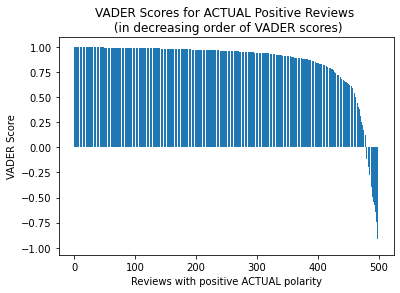

In [ ]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()